#Analysis of Gold and Bitcoin miners



In [1]:
# Import modules
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import numpy as np
import hvplot.pandas
import plotly.express as px
import holoviews as hv
from holoviews import opts

In [2]:
#load dotenv
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Generate Alpaca keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
#Set time frame
timeframe = "1D"

In [4]:
# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-25", tz="America/New_York").isoformat()
# Set tickers
tickers = ["MARA","RIOT","AU","AEM"]
#tickers = ["BTC","ETH"]
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [5]:
# Clean data
df_ticker.dropna(inplace=True)
df_ticker


AEM                                    AU  \
                            open    high    low  close   volume   open   
time                                                                     
2018-05-01 00:00:00-04:00  41.90  42.220  41.04  42.21  1008891   8.99   
2018-05-02 00:00:00-04:00  42.40  42.800  41.86  41.97   892399   9.14   
2018-05-03 00:00:00-04:00  42.43  42.700  42.06  42.41   799660   9.27   
2018-05-04 00:00:00-04:00  42.13  42.790  42.13  42.64   559123   8.82   
2018-05-07 00:00:00-04:00  42.49  43.010  42.40  42.77   469028   8.83   
...                          ...     ...    ...    ...      ...    ...   
2021-07-19 00:00:00-04:00  60.50  61.550  60.04  60.75  1233291  19.30   
2021-07-20 00:00:00-04:00  61.12  62.149  60.43  60.95  1043061  19.68   
2021-07-21 00:00:00-04:00  60.57  61.420  60.12  61.18   673712  19.18   
2021-07-22 00:00:00-04:00  60.88  61.020  59.55  60.37   858522  19.54   
2021-07-23 00:00:00-04:00  60.09  60.360  59.36  59.95   847514  19.37   

                                                               MARA         \
                              high      low   close   volume   open   high   
time                                                                         
2018-05-01 00:00:00-04:00   9.0600   8.8899   9.020  1847647   1.69   1.71   
2018-05-02 00:00:00-04:00   9.3800   9.1000   9.160  4093153   1.64   1.68   
2018-05-03 00:00:00-04:00   9.2900   8.8800   8.900  5524215   1.56   1.77   
2018-05-04 00:00:00-04:00   8.9300   8.7400   8.885  3609019   1.80   1.80   
2018-05-07 00:00:00-04:00   8.8800   8.5000   8.565  3925005   1.58   1.64   
...                            ...      ...     ...      ...    ...    ...   
2021-07-19 00:00:00-04:00  19.6200  19.1400  19.390  2403054  22.09  23.26   
2021-07-20 00:00:00-04:00  20.0600  19.4400  19.590  2166892  21.92  22.90   
2021-07-21 00:00:00-04:00  19.6400  19.1700  19.550  1669455  24.13  25.70   
2021-07-22 00:00:00-04:00  19.5736  19.1700  19.330  1597963  25.45  25.64   
2021-07-23 00:00:00-04:00  19.4400  19.0300  19.220  2104119  25.05  25.35   

                                                        RIOT                  \
                               low    close    volume   open   high      low   
time                                                                           
2018-05-01 00:00:00-04:00   1.5600   1.6200   1703773   7.14   7.47   7.0200   
2018-05-02 00:00:00-04:00   1.5500   1.5650   1225389   7.37   7.37   7.1432   
2018-05-03 00:00:00-04:00   1.5600   1.7597   2650072   7.36   7.67   7.1100   
2018-05-04 00:00:00-04:00   1.6100   1.6500   1756510   7.90   8.15   7.4110   
2018-05-07 00:00:00-04:00   1.5600   1.5950    897813   7.31   7.80   7.3100   
...                            ...      ...       ...    ...    ...      ...   
2021-07-19 00:00:00-04:00  21.6700  22.3500   5495399  25.99  26.87  25.5700   
2021-07-20 00:00:00-04:00  20.6100  22.6700   5894828  25.35  26.32  23.9300   
2021-07-21 00:00:00-04:00  23.9604  25.0500  10135522  27.80  29.91  27.6100   
2021-07-22 00:00:00-04:00  24.0800  25.2600   6391426  29.25  29.44  27.7200   
2021-07-23 00:00:00-04:00  23.8000  24.6500   5045859  28.89  29.75  27.0500   

                                             
                            close    volume  
time                                         
2018-05-01 00:00:00-04:00   7.340    238979  
2018-05-02 00:00:00-04:00   7.210    173215  
2018-05-03 00:00:00-04:00   7.660    310503  
2018-05-04 00:00:00-04:00   7.530    584968  
2018-05-07 00:00:00-04:00   7.540    404138  
...                           ...       ...  
2021-07-19 00:00:00-04:00  25.930   5739228  
2021-07-20 00:00:00-04:00  25.850   6477411  
2021-07-21 00:00:00-04:00  29.150  11329112  
2021-07-22 00:00:00-04:00  28.864   6850411  
2021-07-23 00:00:00-04:00  28.090   7345094  

[814 rows x 20 columns]

In [6]:
# Run a Monte Carlo simulation on the 4 stockw
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [7]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3          4           5    \
0      1.000000  1.000000   1.000000   1.000000   1.000000    1.000000   
1      1.054082  0.983438   0.998669   1.057982   0.969509    0.997235   
2      1.098876  1.007342   1.017435   1.088360   0.991579    1.029645   
3      1.029304  0.895222   0.954475   1.152495   1.043195    1.061379   
4      1.028858  0.891791   1.001859   1.200380   1.004944    1.070219   
...         ...       ...        ...        ...        ...         ...   
1256  84.583599  4.520964  44.872098  31.931394  48.016473  108.419298   
1257  81.485043  4.544603  42.319757  31.425669  50.856768  112.515404   
1258  86.187101  4.367667  44.157446  30.507643  49.789269  114.070297   
1259  83.753252  4.434589  38.789865  33.331395  48.066492  111.946019   
1260  84.933757  4.243060  42.547015  33.482426  51.827266  116.683549   

             6         7           8          9    ...        990         991  \
0       1.000000  1.000000    1.000000   1.000000  ...   1.000000    1.000000   
1       1.058463  0.973350    1.008796   0.976320  ...   0.996205    0.954494   
2       1.055459  0.945109    0.986631   1.035361  ...   0.970222    0.919328   
3       1.124435  0.978728    1.008153   1.037308  ...   0.972090    0.927198   
4       1.102494  1.005964    1.017148   0.912610  ...   0.972979    0.951134   
...          ...       ...         ...        ...  ...        ...         ...   
1256  830.882712  4.848201  130.476610  41.827962  ...  71.124391  396.483477   
1257  850.019621  4.842911  129.219317  43.442828  ...  72.662224  371.707046   
1258  864.663993  4.854834  133.544240  43.134854  ...  71.694489  376.358465   
1259  918.502550  4.936069  127.775532  44.478347  ...  72.274334  407.663673   
1260  921.078320  4.915698  129.801704  41.710421  ...  72.849694  411.956099   

            992        993        994         995        996        997  \
0      1.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
1      1.033440   1.025614   1.027477    1.038515   1.070539   0.968824   
2      0.989006   1.020312   1.031660    0.996892   1.092513   1.004694   
3      1.016571   1.144448   1.060656    0.998739   1.119958   1.105942   
4      1.103826   1.132541   1.042756    1.031955   1.143436   1.079913   
...         ...        ...        ...         ...        ...        ...   
1256  26.622638  27.640750  16.660670  236.035455  33.777286  48.101915   
1257  26.530179  28.207565  16.536973  222.524567  32.424137  49.275785   
1258  26.622876  27.821626  16.286366  233.398560  32.395751  53.118218   
1259  26.120501  27.971174  17.030585  232.561447  34.032743  50.217202   
1260  25.065964  29.800670  17.389777  238.956338  35.028664  49.371895   

             998        999  
0       1.000000   1.000000  
1       0.947440   1.001218  
2       0.947667   0.973186  
3       0.930664   0.995712  
4       0.866521   0.989612  
...          ...        ...  
1256  116.899506  37.996506  
1257  104.754454  39.788506  
1258  102.599843  44.035177  
1259  101.343089  44.694196  
1260  101.967327  48.682258  

[1261 rows x 1000 columns]

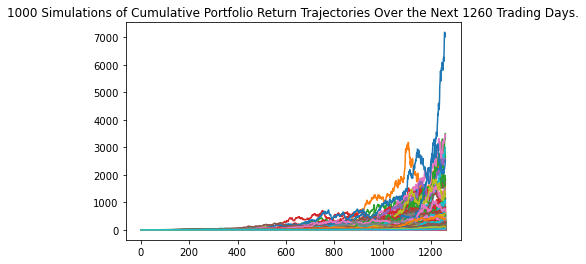

In [8]:
line_plot = MC_even_dist.plot_simulation()

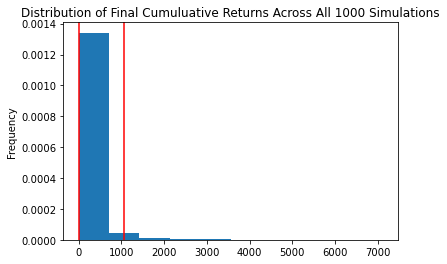

In [9]:
dist_plot = MC_even_dist.plot_distribution()

In [10]:
even_tbl = MC_even_dist.summarize_cumulative_return()
even_tbl

count           1000.000000
mean             164.090040
std              393.662033
min                0.448734
25%               18.877921
50%               52.307558
75%              147.992827
max             7120.745869
95% CI Lower       2.912672
95% CI Upper    1074.601845
Name: 1260, dtype: float64

In [12]:
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $43690.08 and $16119027.67.


In [13]:
# AEM daily returns of last 50 days
aem_day = df_ticker.iloc[:,3].pct_change()
aem_std = df_ticker.iloc[:,3].std()
aem_returns = pd.DataFrame(aem_day)
aem_day = pd.DataFrame(aem_day)
aem_returns = aem_day['AEM'].pct_change().tail(50).hvplot.violin(by= "index.day",
                                                                  title = 'AEM returns. Last 50 days')
aem_returns 

:Violin   [index.day]   (close)


#Plotting Miners


<AxesSubplot:xlabel='time'>

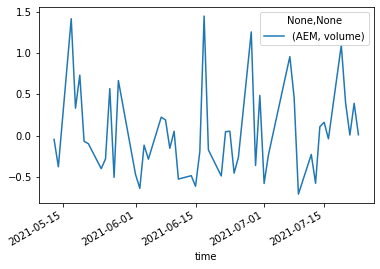

In [76]:
aem_volume = df_ticker.iloc[:,4]
aem_volume = pd.DataFrame(aem_volume)
aem_volume.pct_change()
aem_volume_plot = aem_volume.pct_change(30).tail(50).plot()
aem_volume_plot

In [77]:
aem_ewm = aem_day.rolling(window=200).mean()#.plot()
aem_ewm.dropna(inplace= True)
aem_ewm_plot = aem_ewm['AEM'].hvplot()
aem_ewm_plot 

:Curve   [time]   (close)

In [102]:
au_day = df_ticker.iloc[:,8]
au_returns = pd.DataFrame(au_day)
au_returns.dropna(inplace = True)
au_std = au_returns.std()
au_day = pd.DataFrame(au_day)
au_returns = au_day['AU'].pct_change().hvplot.violin(by= 'index.month',
                                                               title = "AU daily returns. Last 50 days")
au_daily = au_day.pct_change()
au_returns




:Violin   [index.month]   (close)

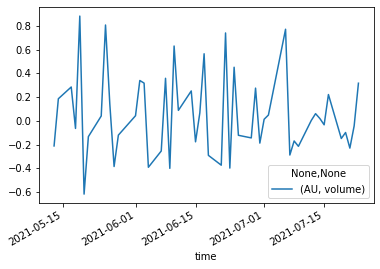

In [99]:
au_volume = df_ticker.iloc[:,9]
au_volume = pd.DataFrame(au_volume)
au_volume_pct = au_volume.pct_change()
au_volume_pct_plot = au_volume_pct.tail(50).plot()

In [16]:
au_ewm = au_day.rolling(window=60).mean()#.plot()
au_ewm.dropna(inplace= True)
au_ewm_plot = au_ewm['AU'].hvplot()

au_ewm_plot

:Curve   [time]   (close)

In [17]:
#au_day.rolling(window=60).mean().plot()

In [18]:
au_std

AU  close    6.60725
dtype: float64

In [19]:
mara_day = df_ticker.iloc[:,13]

In [20]:
mara_returns = mara_day.pct_change()
mara_std = mara_returns.std()
mara_std
mara_returns = pd.DataFrame(mara_returns)
mara_returns.dropna(inplace = True)
mara_day = pd.DataFrame(mara_day)
mara_returns_plot = mara_day['MARA'].pct_change().hvplot.violin(by= "index.month",
                                                                          title = "MARA daily returns. Last 50 days")


In [21]:
mara_returns_plot 

:Violin   [index.month]   (close)

In [87]:
mara_volume = df_ticker.iloc[:,14]
mara_volume = pd.DataFrame(mara_volume)
mara_volume

MARA
                             volume
time                               
2018-05-01 00:00:00-04:00   1703773
2018-05-02 00:00:00-04:00   1225389
2018-05-03 00:00:00-04:00   2650072
2018-05-04 00:00:00-04:00   1756510
2018-05-07 00:00:00-04:00    897813
...                             ...
2021-07-19 00:00:00-04:00   5495399
2021-07-20 00:00:00-04:00   5894828
2021-07-21 00:00:00-04:00  10135522
2021-07-22 00:00:00-04:00   6391426
2021-07-23 00:00:00-04:00   5045859

[814 rows x 1 columns]

<AxesSubplot:xlabel='time'>

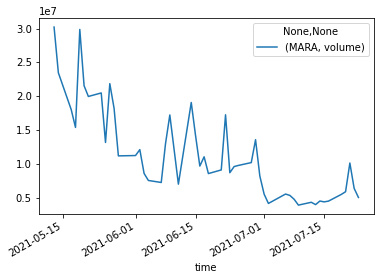

In [101]:
mara_volume_plot = mara_volume.tail(50).plot()
mara_volume_plot

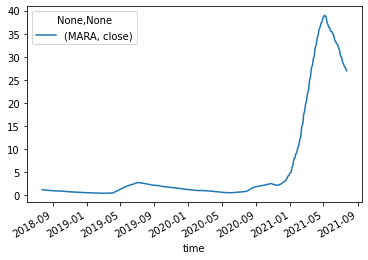

In [22]:
#  Plot MARA 50 day moving average
mara_ewm = mara_day.rolling(window=60).mean().plot()

In [23]:
riot_day = df_ticker.iloc[:,18]

In [24]:
# Plot RIOT daily returns
riot_day = pd.DataFrame(riot_day)
riot_returns = riot_day['RIOT'].pct_change().hvplot.violin(by= 'index.month'
                                                                     , title = "RIOT daily returns. Last 50 days")
riot_daily =  riot_day['RIOT'].pct_change()
riot_daily
riot_returns

:Violin   [index.month]   (close)

In [25]:
#riot_returns = riot_day.pct_change().tail(60).hvplot()
riot_std = riot_day['RIOT'].std()
riot_std

close    14.086936
dtype: float64

In [57]:
riot_monthly = riot_day['RIOT'].pct_change(30).hvplot()
riot_monthly

:Curve   [time]   (close)

In [92]:
riot_volume = df_ticker.iloc[:,19]
riot_volume = pd.DataFrame(riot_volume)
riot_volume

RIOT
                             volume
time                               
2018-05-01 00:00:00-04:00    238979
2018-05-02 00:00:00-04:00    173215
2018-05-03 00:00:00-04:00    310503
2018-05-04 00:00:00-04:00    584968
2018-05-07 00:00:00-04:00    404138
...                             ...
2021-07-19 00:00:00-04:00   5739228
2021-07-20 00:00:00-04:00   6477411
2021-07-21 00:00:00-04:00  11329112
2021-07-22 00:00:00-04:00   6850411
2021-07-23 00:00:00-04:00   7345094

[814 rows x 1 columns]

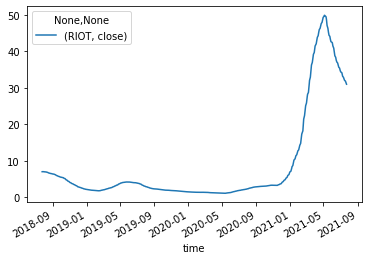

In [52]:
#  Plot RIOT 60 day moving average
riot_ewm = riot_day.rolling(window=60).mean().plot()

In [27]:
#riot_std =pd.DataFrame(riot_std)



In [28]:
riot_std

close    14.086936
dtype: float64

In [29]:
#au_std =pd.DataFrame(au_std)

In [30]:
dxy = pd.read_csv("DX-Y.NYB.csv", index_col = 'Date',
                 infer_datetime_format = True, parse_dates = True)
dxy_returns = dxy['Close'].pct_change()
dxy_returns = pd.DataFrame(dxy_returns)
dxy_returns.dropna(inplace= True)
dxy_returns.rename(columns = {'Close': 'DXY_Returns'})
dxy_returns.index = pd.to_datetime(dxy_returns.index).tz_localize('Etc/UCT')
dxy_tail = dxy_returns.tail(813)

In [31]:
all_daily = pd.concat([riot_daily, mara_returns, au_daily,aem_day] , axis = 1, join ='outer')
all_daily

close  (MARA, close)  (AU, close)  (AEM, close)
time                                                                         
2018-05-01 00:00:00-04:00       NaN            NaN          NaN           NaN
2018-05-02 00:00:00-04:00 -0.017711      -0.033951     0.015521     -0.005686
2018-05-03 00:00:00-04:00  0.062413       0.124409    -0.028384      0.010484
2018-05-04 00:00:00-04:00 -0.016971      -0.062340    -0.001685      0.005423
2018-05-07 00:00:00-04:00  0.001328      -0.033333    -0.036016      0.003049
...                             ...            ...          ...           ...
2021-07-19 00:00:00-04:00 -0.048440      -0.042006    -0.009198     -0.007677
2021-07-20 00:00:00-04:00 -0.003085       0.014318     0.010315      0.003292
2021-07-21 00:00:00-04:00  0.127660       0.104985    -0.002042      0.003774
2021-07-22 00:00:00-04:00 -0.009811       0.008383    -0.011253     -0.013240
2021-07-23 00:00:00-04:00 -0.026815      -0.024149    -0.005691     -0.006957

[814 rows x 4 columns]

<AxesSubplot:>

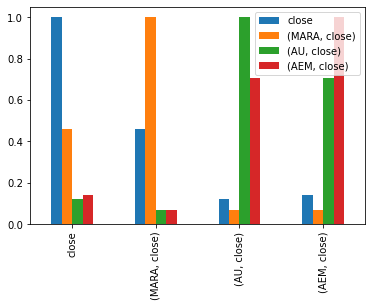

In [32]:
all_daily.corr().plot.bar()

In [33]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
timeframe = "1D"

In [34]:
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-25", tz="America/New_York").isoformat()

In [35]:
# Set tickers
tickers = ["" , "GLD"]


In [36]:
df_ticker1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [37]:
df_ticker1

GLD                                   
                             open     high     low   close    volume
time                                                                
2020-05-01 00:00:00-04:00  158.00  160.450  157.80  159.73  10553977
2020-05-04 00:00:00-04:00  160.33  160.950  159.91  160.34   7665709
2020-05-05 00:00:00-04:00  160.16  161.100  159.33  160.97  10207612
2020-05-06 00:00:00-04:00  158.99  159.810  158.10  159.00  12091560
2020-05-07 00:00:00-04:00  159.50  161.960  159.36  161.44  13113038
...                           ...      ...     ...     ...       ...
2021-07-19 00:00:00-04:00  169.51  169.910  168.89  169.62   6052467
2021-07-20 00:00:00-04:00  170.51  170.800  168.92  169.39   6161415
2021-07-21 00:00:00-04:00  168.33  169.000  168.14  168.75   4014850
2021-07-22 00:00:00-04:00  168.49  169.191  168.06  169.11   4200454
2021-07-23 00:00:00-04:00  168.50  168.880  167.95  168.56   4987762

[310 rows x 5 columns]

In [38]:
df_ticker1.head(100)

GLD                                  
                             open    high     low   close    volume
time                                                               
2020-05-01 00:00:00-04:00  158.00  160.45  157.80  159.73  10553977
2020-05-04 00:00:00-04:00  160.33  160.95  159.91  160.34   7665709
2020-05-05 00:00:00-04:00  160.16  161.10  159.33  160.97  10207612
2020-05-06 00:00:00-04:00  158.99  159.81  158.10  159.00  12091560
2020-05-07 00:00:00-04:00  159.50  161.96  159.36  161.44  13113038
...                           ...     ...     ...     ...       ...
2020-09-16 00:00:00-04:00  184.98  185.01  183.33  183.95  11812641
2020-09-17 00:00:00-04:00  181.92  183.09  181.48  182.97   7894844
2020-09-18 00:00:00-04:00  183.07  184.09  182.64  183.17   8278178
2020-09-21 00:00:00-04:00  179.84  180.29  176.75  179.49  15877761
2020-09-22 00:00:00-04:00  179.63  180.02  178.11  178.63   6921558

[100 rows x 5 columns]

In [39]:
# Run a Monte Carlo simulation on the 4 stockw
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker1,
    weights = [1,],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [40]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.014927  1.013898  1.014579  1.031396  1.013814  0.995876  1.005670   
2     1.019379  1.005554  1.008562  1.032560  1.032939  1.006520  1.013453   
3     1.003735  0.999616  0.999709  1.035517  1.041715  1.008368  1.023086   
4     0.997358  0.998720  0.990633  1.053773  1.030574  1.007989  1.013965   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.375460  0.932976  1.778946  1.438241  1.069572  1.267430  1.823461   
1257  2.412351  0.932163  1.777987  1.430402  1.075846  1.267284  1.822491   
1258  2.414584  0.925834  1.777868  1.432708  1.070983  1.266601  1.846521   
1259  2.402121  0.930770  1.767755  1.441860  1.056890  1.277410  1.865178   
1260  2.426135  0.934264  1.778830  1.422018  1.073330  1.276694  1.831453   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.985904  0.995798  0.988234  ...  0.982483  0.985013  1.010518   
2     0.989889  0.998983  1.003366  ...  0.967390  0.984951  1.004367   
3     0.985324  0.993196  0.991556  ...  0.968882  1.000577  0.990511   
4     0.987715  1.018267  0.999770  ...  0.983292  1.002125  0.987785   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.864204  1.093940  1.367103  ...  1.822992  1.979795  1.035651   
1257  1.840901  1.097407  1.397651  ...  1.816060  1.967150  1.033532   
1258  1.852280  1.090604  1.400208  ...  1.818983  1.959057  1.034399   
1259  1.873194  1.074412  1.416073  ...  1.824745  1.975270  1.014832   
1260  1.880622  1.065357  1.427640  ...  1.812707  1.986057  1.007078   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.999440  0.992030  0.995230  1.008960  0.994271  1.003872  1.007949  
2     0.985699  0.991462  0.997260  1.015054  0.985655  1.015283  0.992180  
3     0.988794  0.983774  0.989118  1.020271  0.985629  1.030538  0.992344  
4     0.984339  0.998681  0.975650  1.020134  0.988036  1.026575  0.984989  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.045867  1.274426  2.294366  1.076975  1.180693  1.023142  1.195790  
1257  1.042921  1.282428  2.291639  1.094857  1.182736  1.025450  1.193617  
1258  1.046268  1.277953  2.299899  1.072733  1.185384  1.021801  1.191223  
1259  1.028123  1.279839  2.317523  1.076895  1.176886  1.029158  1.204675  
1260  1.024253  1.287720  2.318641  1.080786  1.162849  1.029751  1.199955  

[1261 rows x 1000 columns]

In [41]:
type(mara_day)

pandas.core.frame.DataFrame

In [42]:
riot_day = pd.DataFrame(riot_day)

In [43]:
riot_date = riot_day.iloc[:,0]#.pct_change().hvplot()

In [44]:
riot_day.columns

MultiIndex([('RIOT', 'close')],
           )

In [45]:
dxy = pd.read_csv("DX-Y.NYB.csv",index_col = "Date",infer_datetime_format= True,
                 parse_dates= True)
dxy.index = pd.to_datetime(dxy.index).tz_localize('Etc/UCT')
dxy.dropna()

Open        High         Low       Close  \
Date                                                                        
1971-08-24 00:00:00+00:00  117.839996  117.839996  117.839996  117.839996   
1971-08-25 00:00:00+00:00  117.839996  117.839996  117.839996  117.839996   
1971-08-26 00:00:00+00:00  117.839996  117.839996  117.839996  117.839996   
1971-08-27 00:00:00+00:00  117.839996  117.839996  117.839996  117.839996   
1971-08-30 00:00:00+00:00  117.839996  117.839996  117.839996  117.839996   
...                               ...         ...         ...         ...   
2021-07-19 00:00:00+00:00   92.709999   93.040001   92.639999   92.889999   
2021-07-20 00:00:00+00:00   92.879997   93.169998   92.800003   92.970001   
2021-07-21 00:00:00+00:00   92.970001   93.190002   92.730003   92.750000   
2021-07-22 00:00:00+00:00   92.800003   92.919998   92.510002   92.820000   
2021-07-23 00:00:00+00:00   92.809998   93.019997   92.779999   92.910004   

                            Adj Close  Volume  
Date                                           
1971-08-24 00:00:00+00:00  117.839996     0.0  
1971-08-25 00:00:00+00:00  117.839996     0.0  
1971-08-26 00:00:00+00:00  117.839996     0.0  
1971-08-27 00:00:00+00:00  117.839996     0.0  
1971-08-30 00:00:00+00:00  117.839996     0.0  
...                               ...     ...  
2021-07-19 00:00:00+00:00   92.889999     0.0  
2021-07-20 00:00:00+00:00   92.970001     0.0  
2021-07-21 00:00:00+00:00   92.750000     0.0  
2021-07-22 00:00:00+00:00   92.820000     0.0  
2021-07-23 00:00:00+00:00   92.910004     0.0  

[12657 rows x 6 columns]

In [46]:
all_daily['close'].hvplot.violin(by= 'index.day')

:Violin   [index.day]   (close)

In [47]:
all_daily.columns

Index(['close', ('MARA', 'close'), ('AU', 'close'), ('AEM', 'close')], dtype='object')

In [48]:
au_day.hvplot.line()

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['AU']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
aii = all_daily.corr().plot()

In [ ]:
hvplot.scatter_matrix(aem_day, c="species")

In [ ]:
dxy_daily = dxy['Close'].pct_change().tail(814)

In [ ]:
dxy_daily = pd.DataFrame(dxy_daily)


In [ ]:
#dxy_daily.reset_index(inplace= True)

In [ ]:
#all_daily1 = pd.merge()
#all_daily1 = pd.concat([all_daily, dxy_daily],axis = 0,join= 'outer',)
#all_daily1.index = pd.to_datetime(all_daily1.index).tz_localize('Etc/UCT')

In [ ]:
all_daily1

In [ ]:
dxy_daily_plot = dxy_daily.tail(50).hvplot.violin(by= 'index.day')

In [ ]:
dxy_daily_plot

In [58]:
df_ticker.columns


MultiIndex([( 'AEM',   'open'),
            ( 'AEM',   'high'),
            ( 'AEM',    'low'),
            ( 'AEM',  'close'),
            ( 'AEM', 'volume'),
            (  'AU',   'open'),
            (  'AU',   'high'),
            (  'AU',    'low'),
            (  'AU',  'close'),
            (  'AU', 'volume'),
            ('MARA',   'open'),
            ('MARA',   'high'),
            ('MARA',    'low'),
            ('MARA',  'close'),
            ('MARA', 'volume'),
            ('RIOT',   'open'),
            ('RIOT',   'high'),
            ('RIOT',    'low'),
            ('RIOT',  'close'),
            ('RIOT', 'volume')],
           )

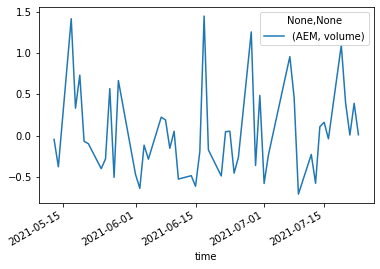

In [75]:
aem_volume = df_ticker.iloc[:,4]
aem_volume = pd.DataFrame(aem_volume)
aem_volume.pct_change()
aem_volume_plot = aem_volume.pct_change(30).tail(50).plot()

AEM
                             volume
time                               
2018-05-01 00:00:00-04:00       NaN
2018-05-02 00:00:00-04:00 -0.115465
2018-05-03 00:00:00-04:00 -0.103921
2018-05-04 00:00:00-04:00 -0.300799
2018-05-07 00:00:00-04:00 -0.161136
...                             ...
2021-07-19 00:00:00-04:00  0.261672
2021-07-20 00:00:00-04:00 -0.154246
2021-07-21 00:00:00-04:00 -0.354101
2021-07-22 00:00:00-04:00  0.274316
2021-07-23 00:00:00-04:00 -0.012822

[814 rows x 1 columns]